In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA



In [305]:
data = pd.read_csv("Dataframe_Study1_ECGsignal.csv")

In [306]:
data.head()

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1,379,788.448549,76.492247,5.554568,24.140212,56.312050,33.645640,23.467771,8.730159,...,9.127375,35.386024,64.613976,0.547653,16628.503018,23.790554,75.878758,3.189449,1.317064,-1.0
1,1,41,709.195122,85.378220,8.033552,22.500000,70.404978,28.694076,18.034156,10.000000,...,9.339315,34.448705,65.551295,0.525523,20076.799931,20.189447,95.378057,4.724154,0.875469,209.0
2,1,221,806.058824,74.636723,3.873437,22.600000,42.029223,28.815400,17.917212,5.909091,...,9.138723,35.567556,64.432444,0.552013,16940.954772,20.374770,55.541974,2.726017,1.571471,309.0
3,2,378,789.243386,76.823032,8.294635,49.655172,79.254143,82.813747,66.363866,30.769231,...,9.204025,33.320305,66.679695,0.499707,17331.456245,58.558162,95.315830,1.627712,1.413580,-1.0
4,2,40,730.800000,82.442370,5.380247,25.615385,47.555743,32.193725,19.755899,12.820513,...,9.319440,34.997279,65.002721,0.538397,19876.971286,22.752260,63.100074,2.773354,inf,209.0


In [307]:
data.dtypes

Patien ID                 int64
NNI counter               int64
NNI mean                float64
HR mean                 float64
HR std                  float64
NNI diff mean           float64
SDNN                    float64
RMSSD                   float64
SDSD                    float64
pnn50                   float64
pnn20                   float64
TRI Index               float64
Welch LogPower VLF      float64
Welch LogPower LF       float64
Welch LogPower HF       float64
Welch NormPower LF      float64
Welch NormPower HF      float64
Welch LF/HF             float64
Welch TotPower          float64
AutoReg LogPower VLF    float64
AutoReg LogPower LF     float64
AutoReg LogPower HF     float64
AutoReg NormPower LF    float64
AutoReg NormPower HF    float64
AutoReg LF/HF           float64
AutoReg TotPower        float64
SD1                     float64
SD2                     float64
SD1/SD2                 float64
SampEntropy             float64
Label                   float64
dtype: o

In [308]:
data = data.replace([np.inf,-np.inf],np.nan)
data.isnull().sum()

Patien ID               0
NNI counter             0
NNI mean                0
HR mean                 0
HR std                  0
NNI diff mean           0
SDNN                    0
RMSSD                   0
SDSD                    0
pnn50                   0
pnn20                   0
TRI Index               0
Welch LogPower VLF      0
Welch LogPower LF       0
Welch LogPower HF       0
Welch NormPower LF      0
Welch NormPower HF      0
Welch LF/HF             0
Welch TotPower          0
AutoReg LogPower VLF    0
AutoReg LogPower LF     0
AutoReg LogPower HF     0
AutoReg NormPower LF    0
AutoReg NormPower HF    0
AutoReg LF/HF           0
AutoReg TotPower        0
SD1                     0
SD2                     0
SD1/SD2                 0
SampEntropy             6
Label                   0
dtype: int64

In [309]:
data['SampEntropy'] = data['SampEntropy'].fillna(data['SampEntropy'].mean())

In [310]:
data['Patien ID']  = data['Patien ID'].astype('float64')
data['NNI counter']  = data['NNI counter'].astype('float64')

In [311]:
def detect_outliers(df,feature_name):
    
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lwr_bound = Q1 -1.5 * IQR
    upp_bound = Q3 +1.5 * IQR 
    
    ls = df.index[np.logical_or(df[feature_name]<lwr_bound, 
                                df[feature_name]>upp_bound)] 
    return ls

In [312]:
outliers_detected={}
for i in data.columns:
    outliers = detect_outliers(data,i)
    outliers_detected[i] = outliers 
    
    print('Variable',i)
    print(outliers)
    print(data[i].iloc[outliers])
    print('\n')

Variable Patien ID
Int64Index([], dtype='int64')
Series([], Name: Patien ID, dtype: float64)


Variable NNI counter
Int64Index([], dtype='int64')
Series([], Name: NNI counter, dtype: float64)


Variable NNI mean
Int64Index([51, 52, 53, 78, 80, 264, 265, 266], dtype='int64')
51     1118.666667
52     1102.040000
53     1091.417178
78     1035.107639
80     1068.047904
264    1102.952030
265    1044.148148
266    1084.115854
Name: NNI mean, dtype: float64


Variable HR mean
Int64Index([133, 178, 181, 235], dtype='int64')
133    123.755824
178    126.508103
181    129.245994
235    134.227002
Name: HR mean, dtype: float64


Variable HR std
Int64Index([47, 90, 91, 92, 133, 134, 178, 179, 185, 277, 290, 317, 319, 322,
            338, 352, 413],
           dtype='int64')
47     14.031895
90     41.262452
91     31.423748
92     13.989100
133    15.212934
134    15.330747
178    17.045380
179    18.571587
185    15.707999
277    17.968380
290    14.795988
317    14.352515
319    23.440159
32

In [313]:

for i in data.columns:
    data[i] = data[i].replace(data[i].iloc[outliers_detected[i]].values,data[i].median())

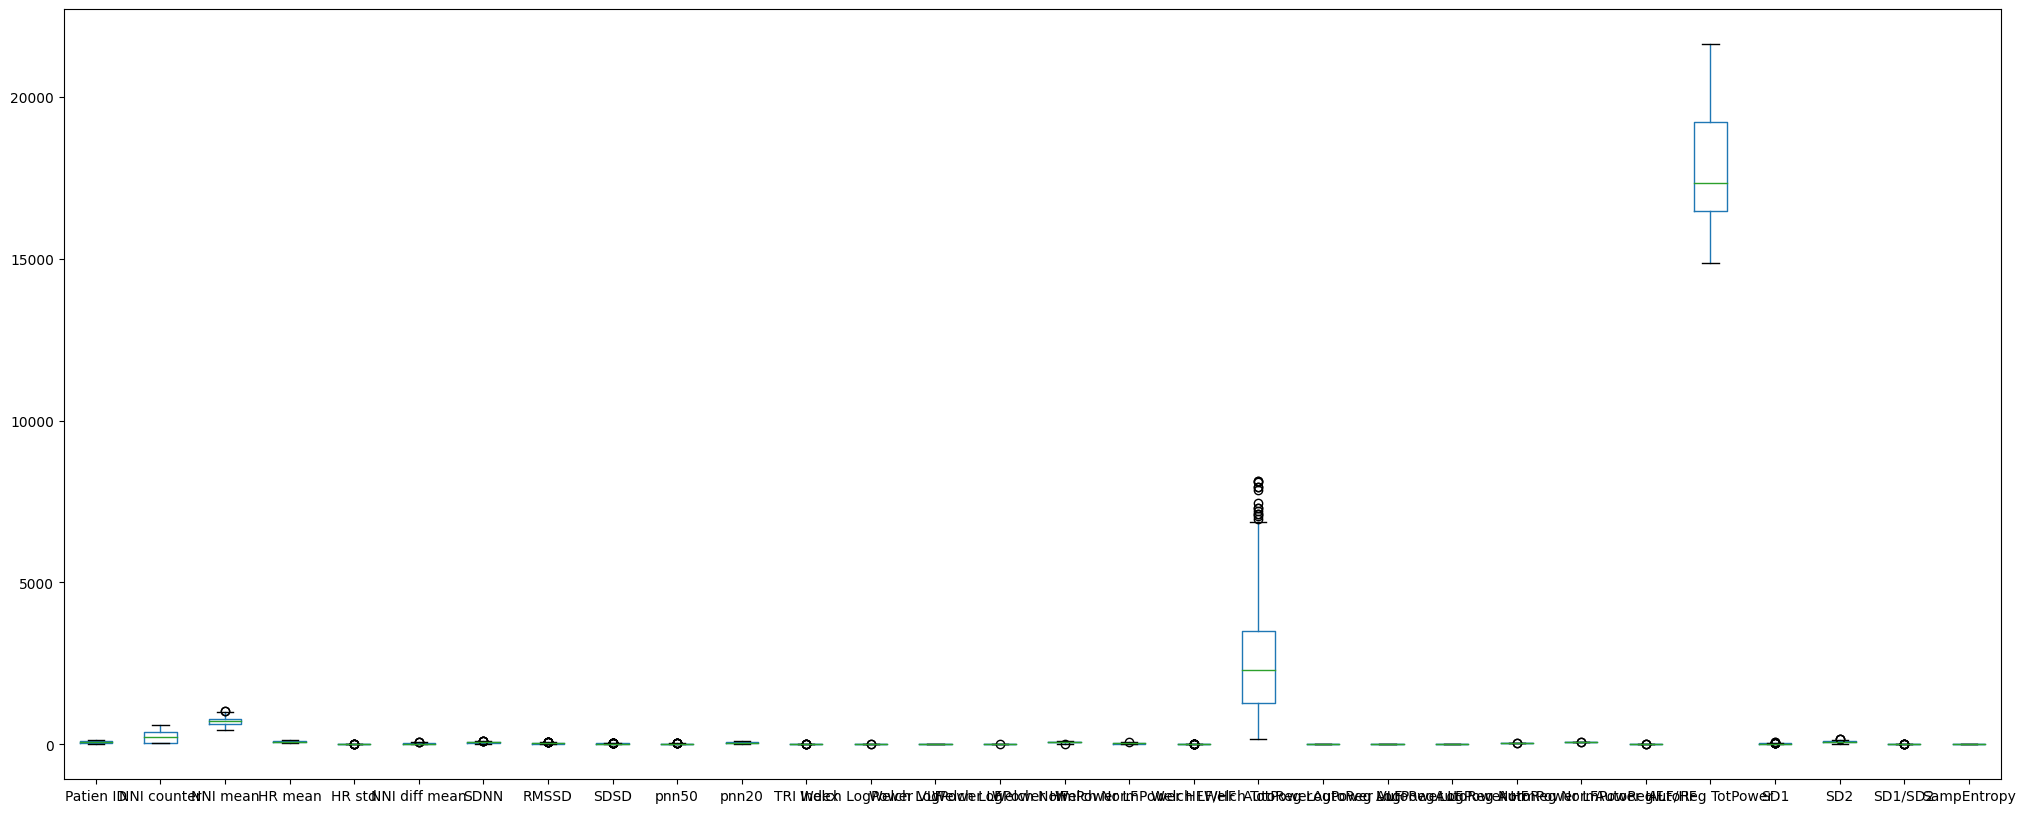

In [314]:
figure(figsize=(25,10))


data.iloc[:,0:-1].boxplot(grid=False)
plt.show()

In [315]:

scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(data)
name=data.columns
df = pd.DataFrame(df,columns=name)

In [316]:
X = df.iloc[:,0:-1]
Y = df['Label']

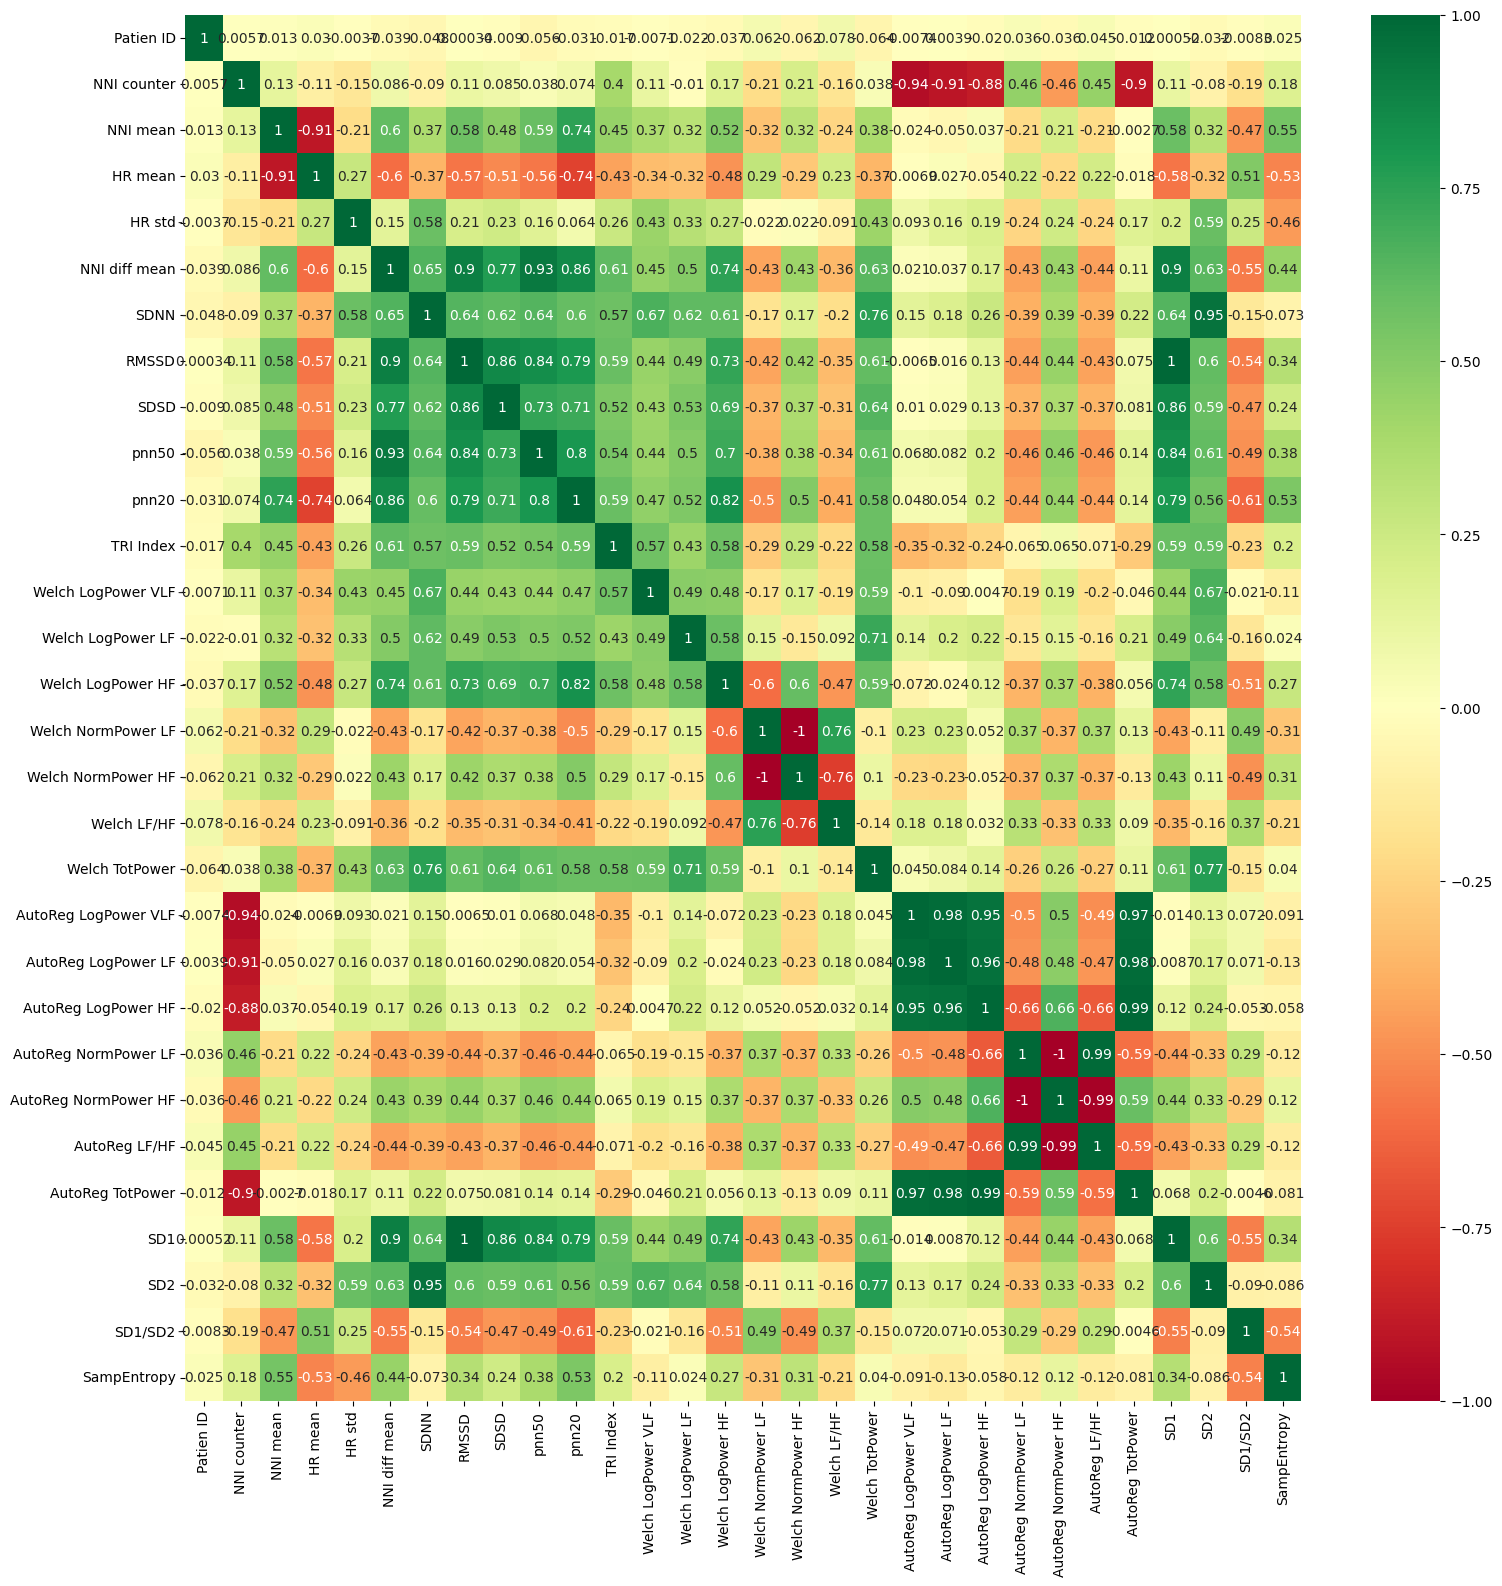

In [317]:
corrmat = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
plt.show()  

In [318]:
X = X.drop(X.columns[X.min() < -0.5],axis=1)

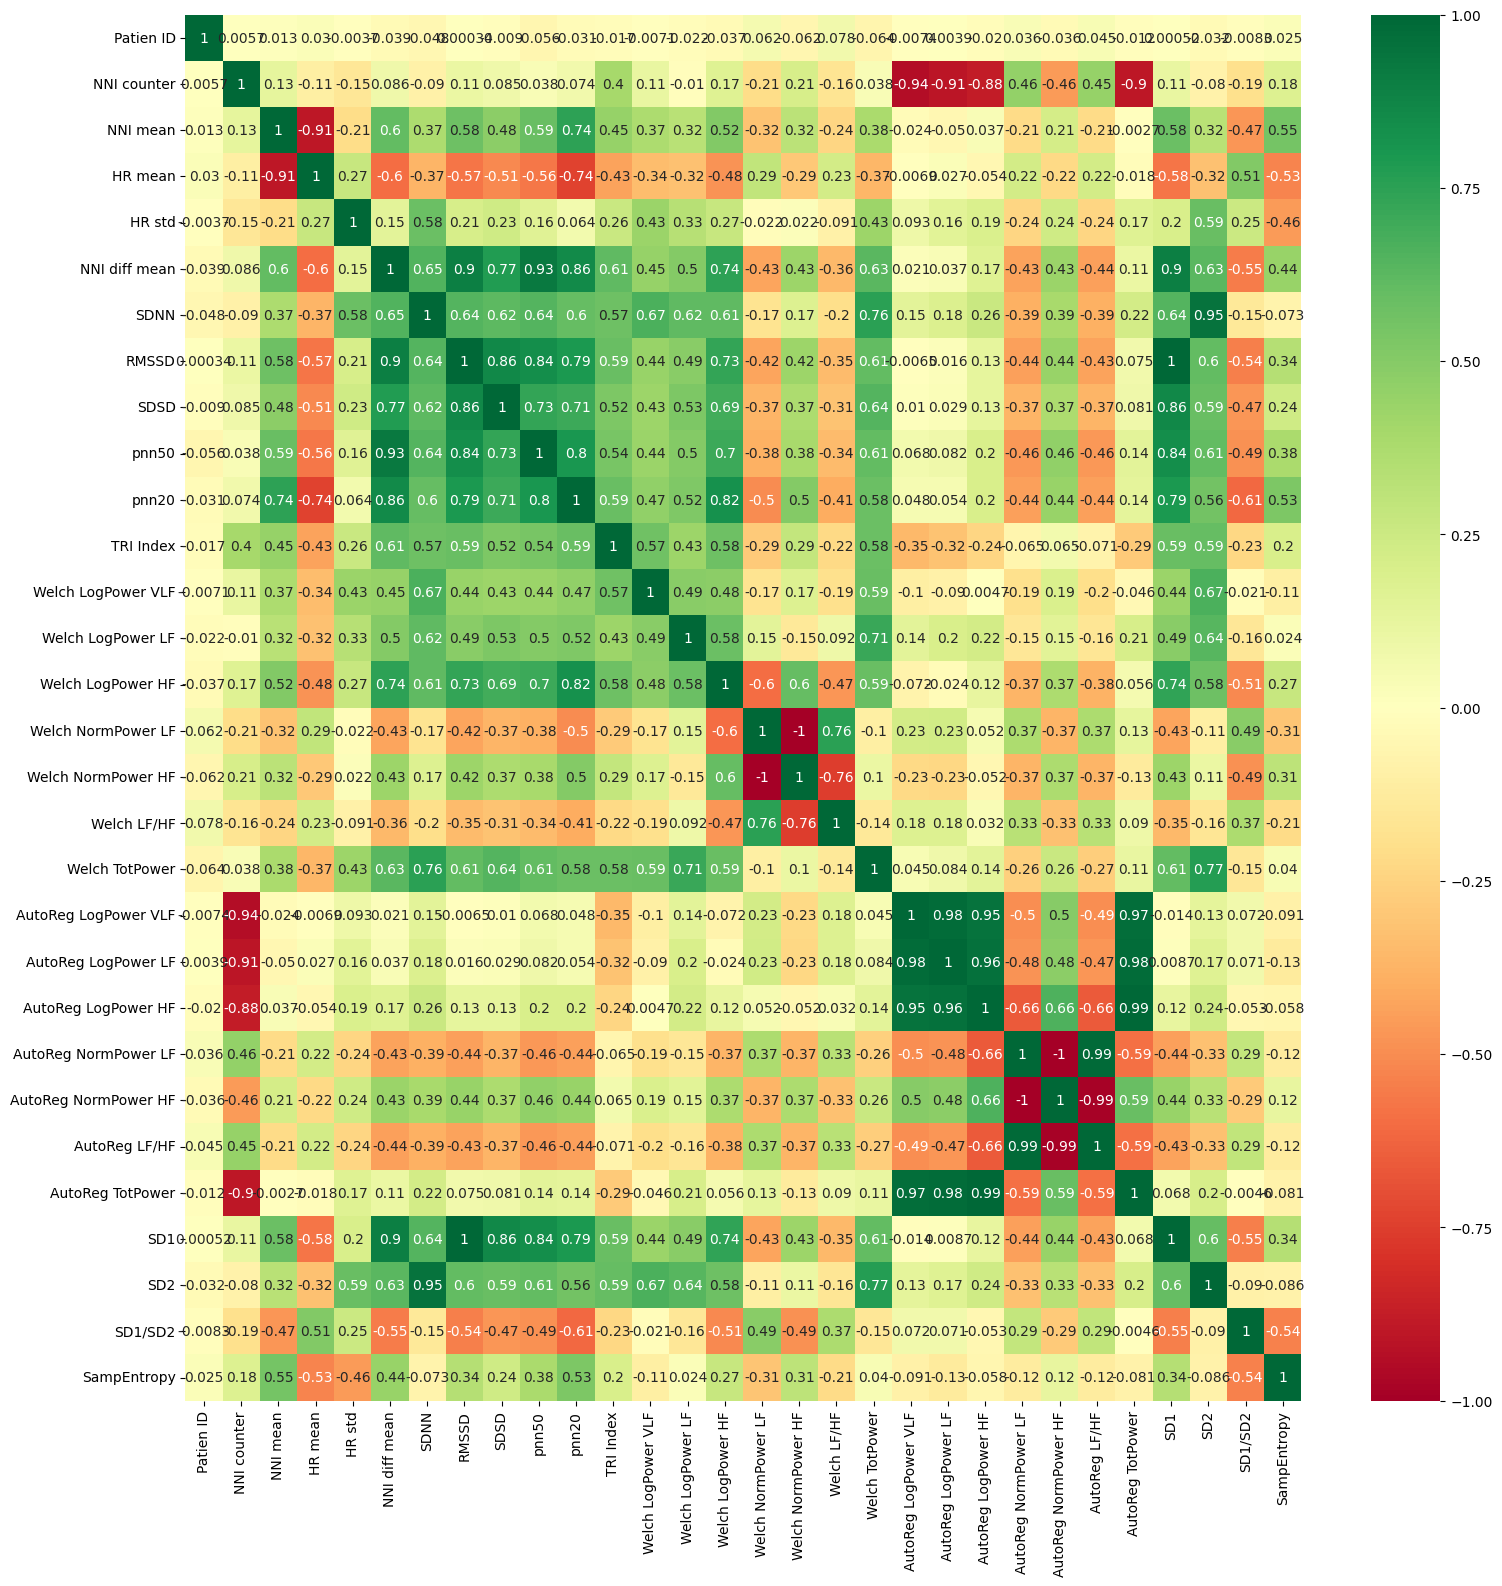

In [319]:
corrmat = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
plt.show()  

In [320]:
np.fill_diagonal(corrmat.values,val=0)
positive = corrmat[corrmat > 0]

In [321]:
threshold = 0.7
postive_corr = positive[positive>threshold]

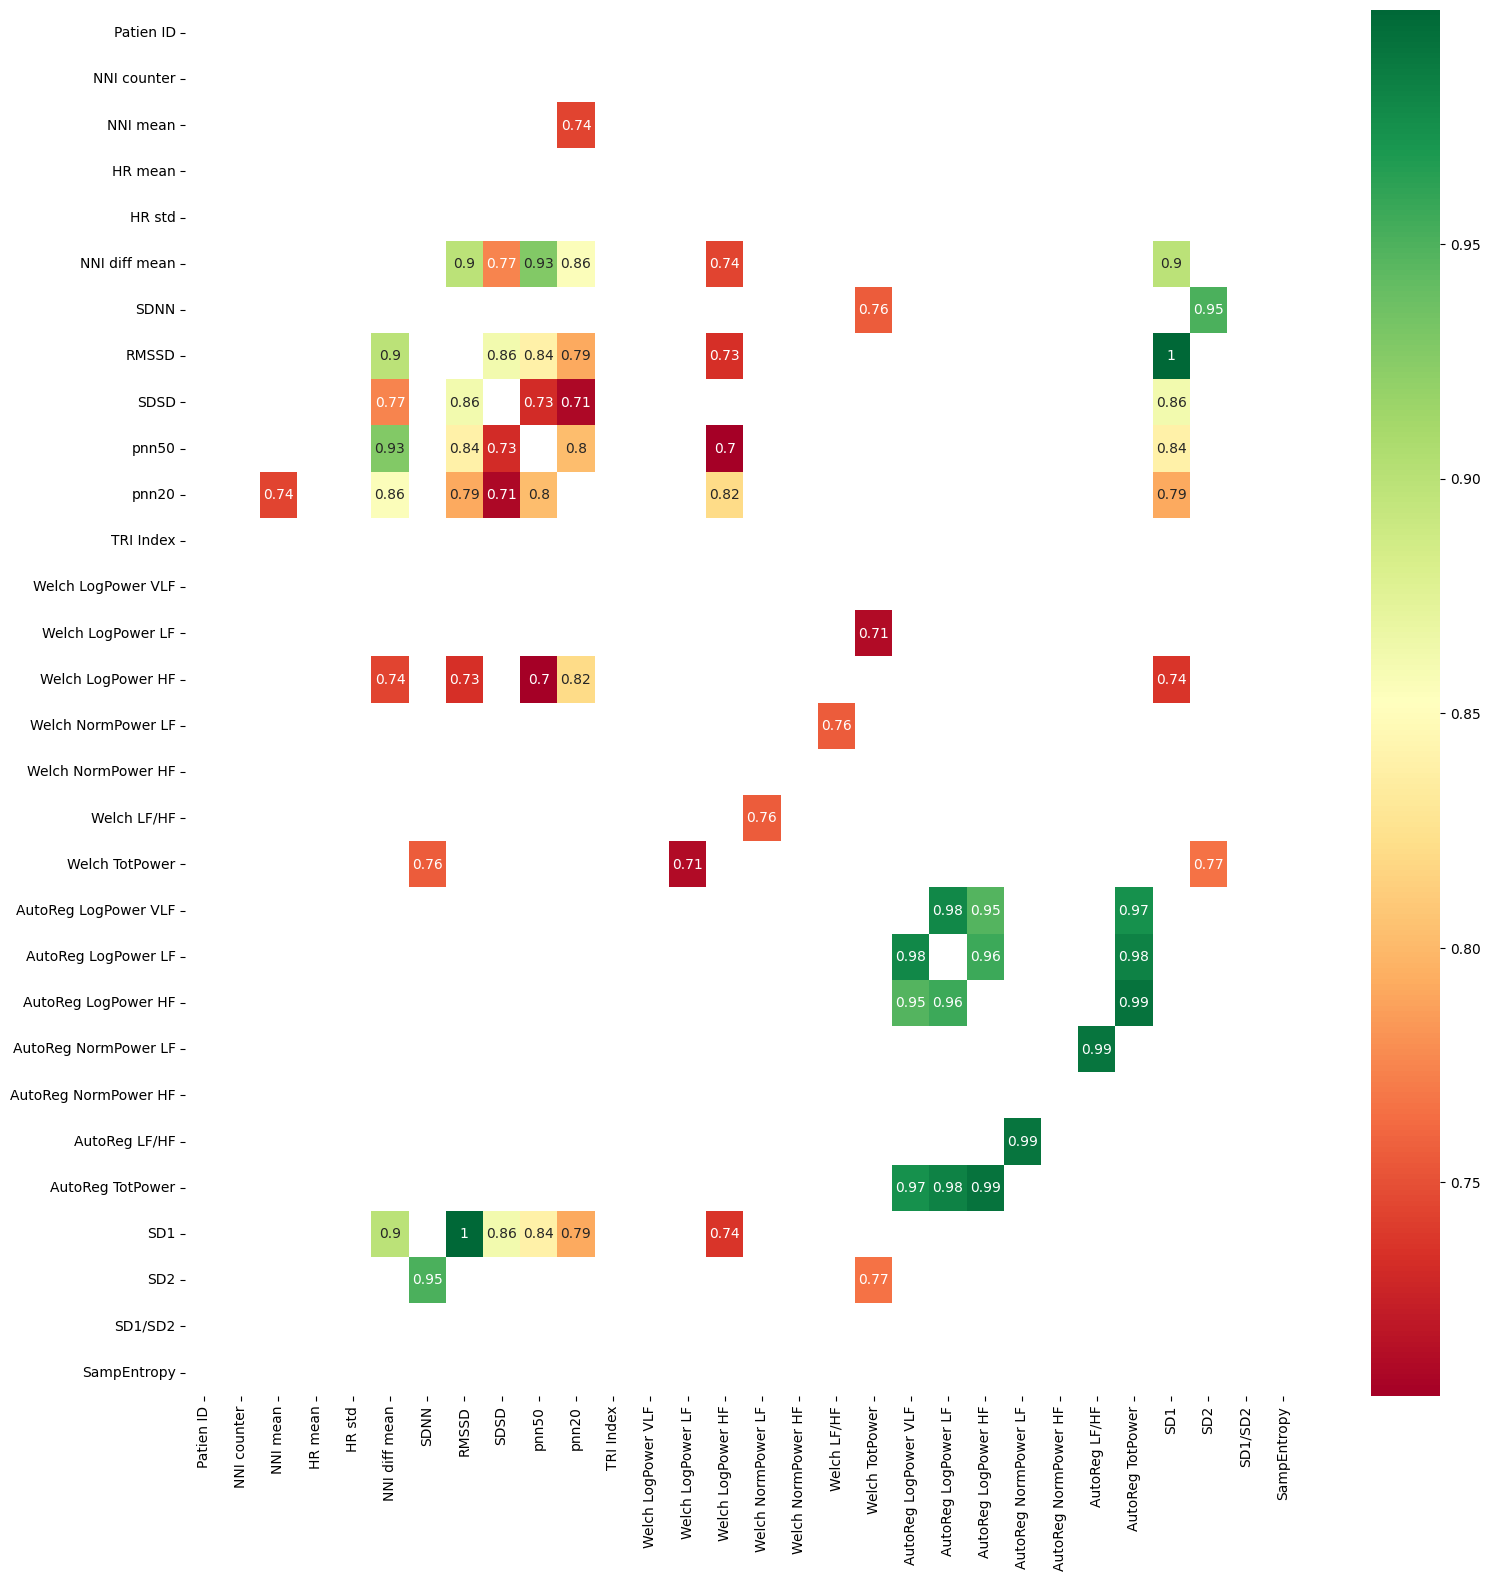

In [322]:
plt.figure(figsize=(18,18))
sns.heatmap(postive_corr,annot=True,cmap="RdYlGn")
plt.show()  

In [323]:
features = postive_corr.dropna(axis=0,how='all').columns

In [324]:
ind = np.where(postive_corr>0.7)
correlated_feat = list(X.columns[ind[0]])

In [325]:
list(set(correlated_feat))

['AutoReg LF/HF',
 'SD1',
 'Welch TotPower',
 'NNI mean',
 'NNI diff mean',
 'Welch LogPower HF',
 'AutoReg NormPower LF',
 'Welch NormPower LF',
 'Welch LF/HF',
 'SDNN',
 'AutoReg TotPower',
 'Welch LogPower LF',
 'SDSD',
 'RMSSD',
 'SD2',
 'pnn20',
 'AutoReg LogPower VLF',
 'AutoReg LogPower LF',
 'pnn50',
 'AutoReg LogPower HF']

In [326]:
x_new = X.get(['RMSSD',
 'SD1',
 'Welch LF/HF',
 'AutoReg NormPower LF',
 'SD2',
 'NNI mean',
 'SDNN',
 'AutoReg TotPower',
 'pnn50',
 'Welch LogPower HF',
 'NNI diff mean',
 'SDSD',
 'Welch TotPower',
 'AutoReg LogPower LF',
 'AutoReg LF/HF',
 'Welch LogPower LF',
 'Welch NormPower LF',
 'AutoReg LogPower VLF',
 'AutoReg LogPower HF',
 'pnn20'])

In [327]:
x_new

,RMSSD,SD1,Welch LF/HF,AutoReg NormPower LF,SD2,NNI mean,SDNN,AutoReg TotPower,pnn50,Welch LogPower HF,NNI diff mean,SDSD,Welch TotPower,AutoReg LogPower LF,AutoReg LF/HF,Welch LogPower LF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.382355,0.384876,0.421530,0.621214,0.411656,0.587446,0.405459,0.259781,0.179739,0.498887,0.377095,0.426199,0.334825,0.300954,0.614954,0.631289,0.747731,0.234016,0.307163,0.490620
1,0.315920,0.316827,0.278649,0.332444,0.553231,0.450576,0.544828,0.770318,0.205882,0.381278,0.346899,0.309330,0.635975,0.806144,0.331116,0.793697,0.938535,0.767305,0.802842,0.490909
2,0.317547,0.320329,0.288299,0.677140,0.264000,0.617858,0.264212,0.306041,0.121658,0.452813,0.348740,0.306814,0.203359,0.358013,0.670880,0.480303,0.662543,0.414625,0.333705,0.520661
3,0.328237,0.330918,0.119768,0.489870,0.552780,0.588818,0.632340,0.363857,0.633484,0.739459,0.846806,0.333006,0.756920,0.256650,0.000000,0.699032,0.427345,0.308749,0.486430,0.769713
4,0.362874,0.365256,0.548200,0.501449,0.318876,0.487887,0.318866,0.740733,0.263952,0.483399,0.404251,0.346362,0.283981,0.818953,0.496241,0.669248,0.797930,0.764517,0.756359,0.475524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0.532198,0.533183,0.133080,0.356516,0.475712,0.567021,0.513363,0.834008,0.743464,0.608048,0.582129,0.524286,0.276655,0.881788,0.354466,0.533971,0.456663,0.798546,0.854529,0.636364
410,0.807197,0.807969,0.092797,0.270585,0.506650,0.759825,0.550430,0.448853,0.339706,0.612193,0.558882,0.333006,0.327228,0.434056,0.271365,0.466753,0.357458,0.442642,0.529636,0.589091
411,0.776592,0.777509,0.199199,0.326754,0.717434,0.574257,0.732431,0.383381,0.680871,0.741841,0.767293,0.864480,0.883452,0.376178,0.325605,0.809910,0.567716,0.338352,0.464988,0.712956
412,0.156000,0.154280,0.378854,0.444465,0.572868,0.153421,0.552354,0.634392,0.038846,0.316416,0.159854,0.168193,0.192494,0.691383,0.440255,0.347695,0.725248,0.641540,0.674590,0.164666


In [328]:

model = LabelEncoder()
y = model.fit_transform(Y)
y

array([0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0,
       2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 1, 0, 2,
       4, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 1,
       0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0,
       2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0, 2, 4, 0, 2,
       4, 0, 2, 4, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 3,
       0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 3, 0,
       2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2,
       1, 0, 2, 1, 0, 2, 3, 0, 2, 1, 0, 2, 4, 0, 2, 4, 0, 2, 3, 0, 2, 1,
       0, 2, 3, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 1, 0,
       2, 4, 0, 2, 1, 0, 2, 4, 0, 2, 4, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0, 2,
       3, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 3,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0,
       2, 4, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0,

In [329]:
test = SelectKBest(score_func = chi2, k = 10) 
new_X = test.fit_transform(x_new,y)

In [330]:
features_SKB = pd.DataFrame({'Feature':list(x_new.iloc[:,:].columns),'Ranking':test.scores_})
print(features_SKB.sort_values(by='Ranking',ascending=False))

                 Feature    Ranking
13   AutoReg LogPower LF  42.940637
7       AutoReg TotPower  39.395961
17  AutoReg LogPower VLF  38.184221
18   AutoReg LogPower HF  33.178525
5               NNI mean   4.659115
3   AutoReg NormPower LF   4.060197
14         AutoReg LF/HF   3.930608
8                  pnn50   3.917681
2            Welch LF/HF   3.832152
16    Welch NormPower LF   3.609077
19                 pnn20   3.491797
1                    SD1   3.441316
0                  RMSSD   3.275249
10         NNI diff mean   3.140592
9      Welch LogPower HF   2.726913
11                  SDSD   2.448601
12        Welch TotPower   1.145602
15     Welch LogPower LF   0.467520
4                    SD2   0.311532
6                   SDNN   0.225202


In [331]:
features = np.array(x_new.iloc[:,:].columns)
filter = test.get_support()
filter

array([False, False,  True,  True, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False])

In [332]:
new_X = pd.DataFrame(new_X,columns=features[filter])
new_X.iloc[0:5,:]

,Welch LF/HF,AutoReg NormPower LF,NNI mean,AutoReg TotPower,pnn50,AutoReg LogPower LF,AutoReg LF/HF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF
0,0.421530,0.621214,0.587446,0.259781,0.179739,0.300954,0.614954,0.747731,0.234016,0.307163
1,0.278649,0.332444,0.450576,0.770318,0.205882,0.806144,0.331116,0.938535,0.767305,0.802842
2,0.288299,0.677140,0.617858,0.306041,0.121658,0.358013,0.670880,0.662543,0.414625,0.333705
3,0.119768,0.489870,0.588818,0.363857,0.633484,0.256650,0.000000,0.427345,0.308749,0.486430
4,0.548200,0.501449,0.487887,0.740733,0.263952,0.818953,0.496241,0.797930,0.764517,0.756359


In [333]:
lr = LogisticRegression(solver='newton-cg').fit(x_new,y)
model = SelectFromModel(lr, threshold = "median", prefit=True, max_features = 10)

In [334]:
model.get_support()

array([False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True])

In [335]:
x_new.iloc[:,:].columns[model.get_support()==True]

Index(['NNI mean', 'AutoReg TotPower', 'pnn50', 'Welch LogPower HF',
       'AutoReg LogPower LF', 'Welch LogPower LF', 'Welch NormPower LF',
       'AutoReg LogPower VLF', 'AutoReg LogPower HF', 'pnn20'],
      dtype='object')

In [336]:
sfm_X = model.transform(x_new)
sfm_X.shape

C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(414, 10)

In [337]:
sfm_X = pd.DataFrame(sfm_X,columns=x_new.iloc[:,:].columns[model.get_support()==True])
sfm_X.head()

,NNI mean,AutoReg TotPower,pnn50,Welch LogPower HF,AutoReg LogPower LF,Welch LogPower LF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.587446,0.259781,0.179739,0.498887,0.300954,0.631289,0.747731,0.234016,0.307163,0.490620
1,0.450576,0.770318,0.205882,0.381278,0.806144,0.793697,0.938535,0.767305,0.802842,0.490909
2,0.617858,0.306041,0.121658,0.452813,0.358013,0.480303,0.662543,0.414625,0.333705,0.520661
3,0.588818,0.363857,0.633484,0.739459,0.256650,0.699032,0.427345,0.308749,0.486430,0.769713
4,0.487887,0.740733,0.263952,0.483399,0.818953,0.669248,0.797930,0.764517,0.756359,0.475524


In [338]:
lr = LogisticRegression(solver='newton-cg')
rfe = RFE(estimator = lr, n_features_to_select = 10)

In [339]:
rfe_X = rfe.fit_transform(x_new,y)

In [340]:
x_new.iloc[:,:].columns[rfe.get_support()==True]

Index(['SD1', 'NNI mean', 'AutoReg TotPower', 'Welch LogPower HF',
       'AutoReg LogPower LF', 'Welch LogPower LF', 'Welch NormPower LF',
       'AutoReg LogPower VLF', 'AutoReg LogPower HF', 'pnn20'],
      dtype='object')

In [341]:
features = np.array(x_new.iloc[:,:].columns)
filter = rfe.get_support()
filter

array([False,  True, False, False, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True])

In [342]:
rfm_X = pd.DataFrame(rfe_X,columns=features[filter])
rfm_X.iloc[0:5,:]

,SD1,NNI mean,AutoReg TotPower,Welch LogPower HF,AutoReg LogPower LF,Welch LogPower LF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.384876,0.587446,0.259781,0.498887,0.300954,0.631289,0.747731,0.234016,0.307163,0.490620
1,0.316827,0.450576,0.770318,0.381278,0.806144,0.793697,0.938535,0.767305,0.802842,0.490909
2,0.320329,0.617858,0.306041,0.452813,0.358013,0.480303,0.662543,0.414625,0.333705,0.520661
3,0.330918,0.588818,0.363857,0.739459,0.256650,0.699032,0.427345,0.308749,0.486430,0.769713
4,0.365256,0.487887,0.740733,0.483399,0.818953,0.669248,0.797930,0.764517,0.756359,0.475524


In [343]:
clf = ExtraTreesClassifier(n_estimators=50).fit(x_new,y)

In [344]:
#pca 1.25*median
#kmeans median
model = SelectFromModel(clf,threshold = "median", prefit=True)

In [345]:
model.get_support()

array([False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True,  True, False,  True,  True,
        True,  True])

In [346]:
features_DT = pd.DataFrame({'Feature':list(x_new.iloc[:,:].columns),'Ranking':clf.feature_importances_})
print(features_DT.sort_values(by='Ranking',ascending=False))

                 Feature   Ranking
17  AutoReg LogPower VLF  0.138700
13   AutoReg LogPower LF  0.136791
18   AutoReg LogPower HF  0.128465
7       AutoReg TotPower  0.095742
3   AutoReg NormPower LF  0.043862
14         AutoReg LF/HF  0.041331
5               NNI mean  0.037726
19                 pnn20  0.036579
16    Welch NormPower LF  0.034126
9      Welch LogPower HF  0.031746
8                  pnn50  0.031559
1                    SD1  0.030920
0                  RMSSD  0.030699
15     Welch LogPower LF  0.027307
6                   SDNN  0.026345
12        Welch TotPower  0.026254
10         NNI diff mean  0.025895
2            Welch LF/HF  0.025631
4                    SD2  0.025523
11                  SDSD  0.024799


In [347]:
np.median(clf.feature_importances_)

0.03165258511693646

In [348]:
etc_X = model.transform(x_new)
etc_X.shape

C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(414, 10)

In [349]:
etc_X = pd.DataFrame(etc_X,columns=x_new.iloc[:,:].columns[model.get_support()==True])
etc_X.head()

,AutoReg NormPower LF,NNI mean,AutoReg TotPower,Welch LogPower HF,AutoReg LogPower LF,AutoReg LF/HF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.621214,0.587446,0.259781,0.498887,0.300954,0.614954,0.747731,0.234016,0.307163,0.490620
1,0.332444,0.450576,0.770318,0.381278,0.806144,0.331116,0.938535,0.767305,0.802842,0.490909
2,0.677140,0.617858,0.306041,0.452813,0.358013,0.670880,0.662543,0.414625,0.333705,0.520661
3,0.489870,0.588818,0.363857,0.739459,0.256650,0.000000,0.427345,0.308749,0.486430,0.769713
4,0.501449,0.487887,0.740733,0.483399,0.818953,0.496241,0.797930,0.764517,0.756359,0.475524


In [350]:
sfs_forward = SequentialFeatureSelector(estimator = clf,n_features_to_select=10,direction = 'forward').fit(x_new,y)

In [351]:
sfs_forward.get_support()

array([False, False, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False, False, False,  True,
        True,  True])

In [352]:
x_new.iloc[:,:].columns[sfs_forward.get_support()==True]

Index(['SD2', 'NNI mean', 'SDNN', 'pnn50', 'Welch LogPower HF',
       'NNI diff mean', 'Welch TotPower', 'AutoReg LogPower VLF',
       'AutoReg LogPower HF', 'pnn20'],
      dtype='object')

In [353]:
X_new4 = sfs_forward.transform(x_new)
X_new4.shape

(414, 10)

In [354]:
sfs_X = pd.DataFrame(X_new4,columns=x_new.iloc[:,:].columns[sfs_forward.get_support()==True])
sfs_X.head()

,SD2,NNI mean,SDNN,pnn50,Welch LogPower HF,NNI diff mean,Welch TotPower,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.411656,0.587446,0.405459,0.179739,0.498887,0.377095,0.334825,0.234016,0.307163,0.490620
1,0.553231,0.450576,0.544828,0.205882,0.381278,0.346899,0.635975,0.767305,0.802842,0.490909
2,0.264000,0.617858,0.264212,0.121658,0.452813,0.348740,0.203359,0.414625,0.333705,0.520661
3,0.552780,0.588818,0.632340,0.633484,0.739459,0.846806,0.756920,0.308749,0.486430,0.769713
4,0.318876,0.487887,0.318866,0.263952,0.483399,0.404251,0.283981,0.764517,0.756359,0.475524


In [355]:
x = x_new.get(['pnn20','NNI mean','AutoReg TotPower','AutoReg LogPower LF','Welch NormPower LF','AutoReg LogPower VLF','AutoReg LogPower HF'])

Tested kMeans with k = 2	Inertia: 68.7783
Tested kMeans with k = 3	Inertia: 46.4535
Tested kMeans with k = 4	Inertia: 36.7264
Tested kMeans with k = 5	Inertia: 31.6672
Tested kMeans with k = 6	Inertia: 28.1409
Tested kMeans with k = 7	Inertia: 25.4229
Tested kMeans with k = 8	Inertia: 23.1164
Tested kMeans with k = 9	Inertia: 21.4614
Tested kMeans with k = 10	Inertia: 20.1327
Tested kMeans with k = 11	Inertia: 19.2807
Tested kMeans with k = 12	Inertia: 17.9501
Tested kMeans with k = 13	Inertia: 17.2000
Tested kMeans with k = 14	Inertia: 16.5373


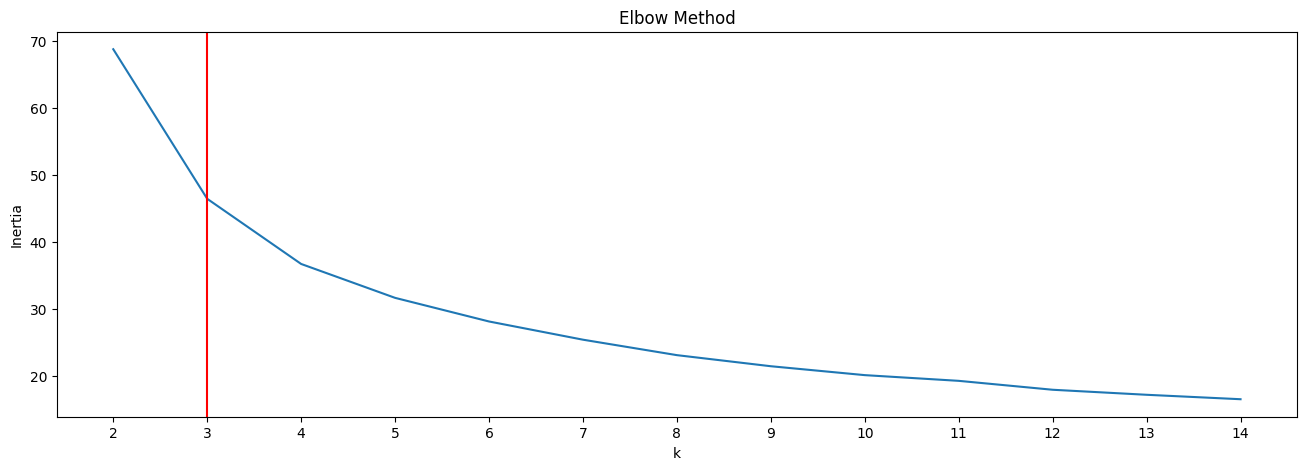

In [356]:

inertia = []
for k in range(2,15,1): 
    kmeans = KMeans(n_clusters = k,random_state = 1234)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    print("Tested kMeans with k = %d\tInertia: %5.4f" % (k, kmeans.inertia_))

figure(figsize = (16,5))
plt.plot(inertia),
plt.xticks(range(0,13,1),range(2,15,1))
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.axvline(1, color = "r")
plt.show()

In [357]:

pca = PCA(n_components=3)


In [358]:
x_pca_fit = pca.fit_transform(x)
print(x_pca_fit.shape,'\n\n 5 observations of the new df:\n',x_pca_fit[0:5])

(414, 3) 

 5 observations of the new df:
 [[-0.32272777  0.00415805 -0.20324577]
 [ 0.71043281 -0.1536494  -0.19840644]
 [-0.17629061  0.07732068 -0.15391333]
 [-0.18315744  0.38293492  0.00686536]
 [ 0.66449314 -0.07823781 -0.10755105]]


<AxesSubplot: >

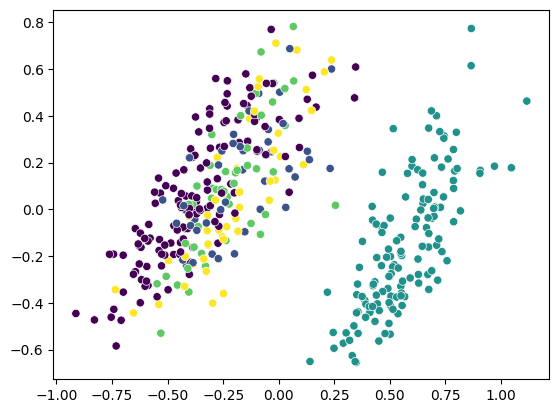

In [359]:
sns.scatterplot(x=x_pca_fit[:,0], y=x_pca_fit[:,1],c=y)

In [360]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(289, 7) (125, 7) (289,) (125,)


In [394]:


x_train, x_test, y_train, y_test = train_test_split(x_pca_fit, y, test_size = 0.3)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(289, 3) (125, 3) (289,) (125,)


In [361]:

logreg = LogisticRegression(max_iter=500,random_state=0)

In [362]:

logreg.fit(x_train,y_train)
lr_pred=logreg.predict(x_test)

In [363]:

cnf_matrix = metrics.confusion_matrix(y_test, lr_pred)
print(cnf_matrix)

[[41  0  1  1  0]
 [10  0  1  0  0]
 [ 0  0 45  0  0]
 [ 9  0  1  0  0]
 [16  0  0  0  0]]


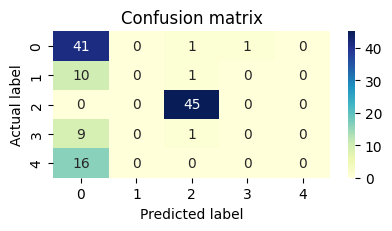

In [364]:

plt.figure(figsize=(4,2))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [365]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69        43
           1       0.00      0.00      0.00        11
           2       0.94      1.00      0.97        45
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        16

    accuracy                           0.69       125
   macro avg       0.30      0.39      0.33       125
weighted avg       0.52      0.69      0.59       125



C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: Unde

In [366]:
accuracy_score(y_test,lr_pred)

0.688

In [367]:
knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(x_train, y_train)

pred_knn = knn.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_knn))

print(classification_report(y_test, pred_knn))

[[41  1  0  0  1]
 [ 4  5  0  2  0]
 [ 0  0 45  0  0]
 [ 2  3  1  4  0]
 [ 8  3  0  4  1]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        43
           1       0.42      0.45      0.43        11
           2       0.98      1.00      0.99        45
           3       0.40      0.40      0.40        10
           4       0.50      0.06      0.11        16

    accuracy                           0.77       125
   macro avg       0.61      0.57      0.55       125
weighted avg       0.74      0.77      0.73       125



In [368]:
accuracy_score(y_test,pred_knn)

0.768

In [369]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)


In [370]:
print(metrics.confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[42  0  0  1  0]
 [ 3  1  0  4  3]
 [ 0  0 45  0  0]
 [ 4  1  1  3  1]
 [ 7  3  0  4  2]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        43
           1       0.20      0.09      0.13        11
           2       0.98      1.00      0.99        45
           3       0.25      0.30      0.27        10
           4       0.33      0.12      0.18        16

    accuracy                           0.74       125
   macro avg       0.50      0.50      0.48       125
weighted avg       0.69      0.74      0.70       125



In [371]:
accuracy_score(y_test,pred)

0.744

In [372]:
par = {'C': [0.1,1, 10, 100], 'kernel': ['rbf'], 'gamma': [1,0.1,0.01,0.001,0.0001]} 


grid = GridSearchCV(SVC(), par , refit = True, verbose = 3)

In [373]:
grid.fit(x_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.328 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [374]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [375]:
grid_pred = grid.predict(x_test)

print(metrics.confusion_matrix(y_test, grid_pred))

accuracy_score(y_test,grid_pred)

[[41  0  0  0  2]
 [ 2  1  0  5  3]
 [ 0  0 45  0  0]
 [ 1  2  1  5  1]
 [ 5  4  0  4  3]]


0.76

In [376]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        43
           1       0.14      0.09      0.11        11
           2       0.98      1.00      0.99        45
           3       0.36      0.50      0.42        10
           4       0.33      0.19      0.24        16

    accuracy                           0.76       125
   macro avg       0.53      0.55      0.53       125
weighted avg       0.72      0.76      0.74       125



In [377]:
accuracy_score(y_test,grid_pred)

0.76

In [378]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0, random_state=0)

dtc.fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)

print(metrics.confusion_matrix(y_test,dtc_pred))

print(classification_report(y_test,dtc_pred))

[[38  3  0  0  2]
 [ 3  2  1  4  1]
 [ 0  0 44  0  1]
 [ 2  3  1  4  0]
 [ 5  5  0  2  4]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        43
           1       0.15      0.18      0.17        11
           2       0.96      0.98      0.97        45
           3       0.40      0.40      0.40        10
           4       0.50      0.25      0.33        16

    accuracy                           0.74       125
   macro avg       0.56      0.54      0.54       125
weighted avg       0.73      0.74      0.72       125



In [379]:
accuracy_score(y_test,dtc_pred)

0.736

In [380]:
k_to_test = range(2,15,1) # [2,3,4, ..., 14]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = KMeans(n_clusters = k,random_state=1234 )
    model_kmeans_k.fit(x)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(x, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("Done!")

Tested kMeans with k = 2	SS: 0.4895
Tested kMeans with k = 3	SS: 0.4131
Tested kMeans with k = 4	SS: 0.3891
Tested kMeans with k = 5	SS: 0.3215
Tested kMeans with k = 6	SS: 0.3133
Tested kMeans with k = 7	SS: 0.3025
Tested kMeans with k = 8	SS: 0.2977
Tested kMeans with k = 9	SS: 0.2852
Tested kMeans with k = 10	SS: 0.2737
Tested kMeans with k = 11	SS: 0.2563
Tested kMeans with k = 12	SS: 0.2409
Tested kMeans with k = 13	SS: 0.2534
Tested kMeans with k = 14	SS: 0.2238
Done!


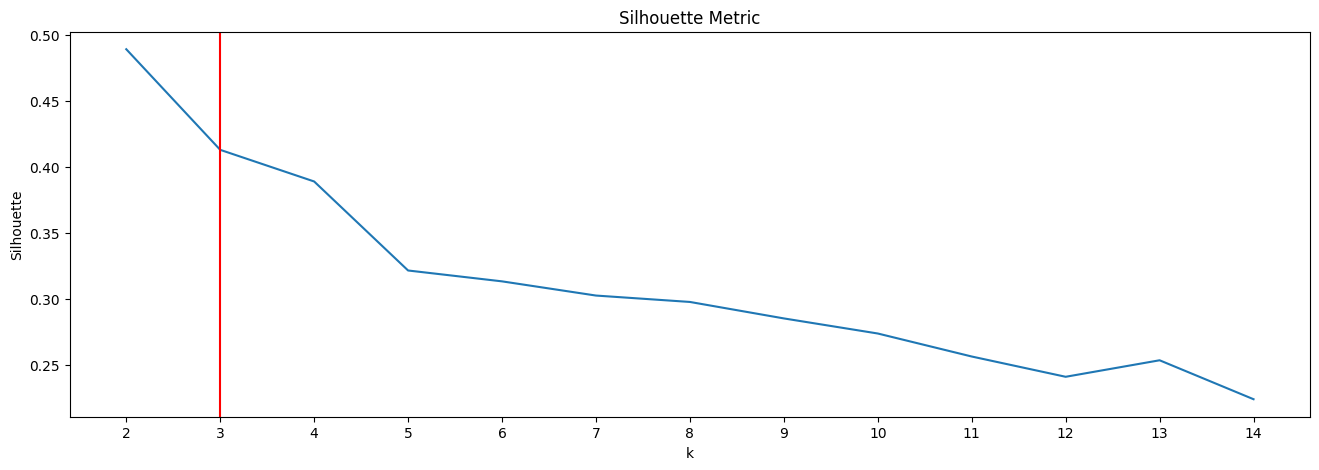

In [381]:
plt.figure(figsize = (16,5))
plt.plot(silhouette_scores.values())
plt.xticks(range(0,13,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.show()

In [395]:

kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(x_train)

KMeans(n_clusters=3)

In [396]:
centroids = kmeans_model.cluster_centers_
centroids.shape

(3, 3)

In [397]:
label = kmeans_model.labels_

In [398]:
print(confusion_matrix(label,y_train))
print(classification_report(y_train,label))

[[64 13  0 16 21]
 [38 12  0 15 19]
 [ 0  0 91  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.56      0.63      0.59       102
           1       0.14      0.48      0.22        25
           2       1.00      1.00      1.00        91
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        40

    accuracy                           0.58       289
   macro avg       0.34      0.42      0.36       289
weighted avg       0.53      0.58      0.54       289



C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: Unde

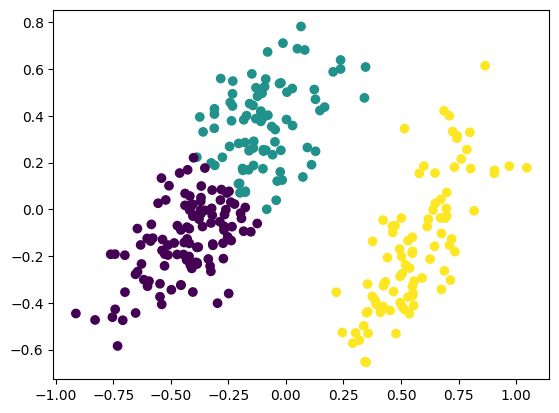

In [399]:
plt.scatter(x_train[:,0],x_train[:,1],c=label)
plt.show()

In [400]:
accuracy_score(y_train,label)

0.5778546712802768

In [401]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

htc_x = hierarchical_cluster.fit(x_train)


In [402]:
htc_pred = hierarchical_cluster.fit_predict(x_test)

print(metrics.confusion_matrix(y_test,htc_pred))

print(classification_report(y_test,htc_pred))

[[ 0 15 21  0  0]
 [ 0 13  5  0  0]
 [47  0  0  0  0]
 [ 1 11  4  0  0]
 [ 0  4  4  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.30      0.72      0.43        18
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         8

    accuracy                           0.10       125
   macro avg       0.06      0.14      0.09       125
weighted avg       0.04      0.10      0.06       125



C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: Unde

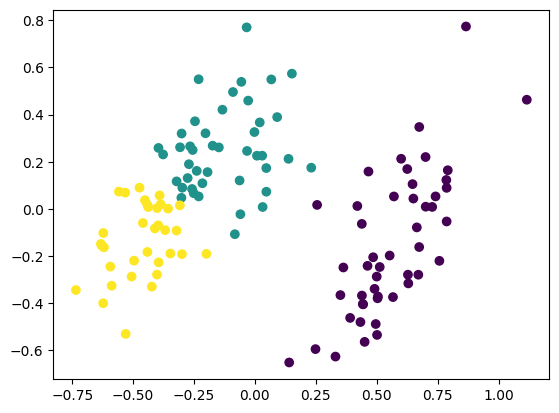

In [403]:
plt.scatter(x_test[:,0],x_test[:,1], c=htc_pred)
plt.show()

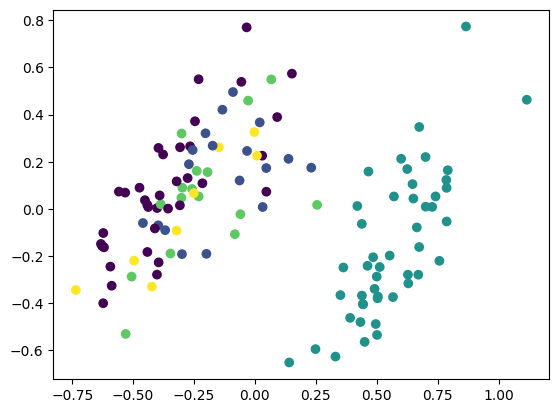

In [404]:
plt.scatter(x_test[:,0],x_test[:,1], c=y_test)
plt.show()

In [406]:

accuracy_score(y_test,htc_pred)

0.104